In [1]:
# import the files
from tradingSimulator import TradingSimulator
simulator = TradingSimulator()

In [2]:
# strategy, cryptocurrency and network supported
# strategy in {
#     'Buy and Hold',
#     'Sell and Hold',
#     'Trend Following Moving Averages',
#     'Mean Reversion Moving Averages',
#     'TDQN'
# }
# cryptocurrency in {'Bitcoin'}
# network in {"DQN", "LSTM", "ConvDuelingDQN"}

In [3]:
# # EDA
# cryptocurrency = "Bitcoin"
# simulator.exploratoryDataAnalysis(cryptocurrency, '2014-01-01', '2021-01-01')

In [4]:
# # randomized search optimization 
# percentageCosts = [0, 0.1, 0.2]
# transactionCosts = percentageCosts[1]/100
# stateLength = 30
# OPTIMIZATION_TRAINING_PARAM = {
#     'money': 100000,
#     'percentageCosts': percentageCosts,
#     'transactionCosts': transactionCosts,
#     'name': 'training',
#     'network': '',
#     # Parameters related to the DQN algorithm
#     'stateLength': stateLength,
#     'numberOfEpisodes': 1,
#     'targetNetworkUpdate': 1000,
#     'learningUpdatePeriod': 1,
#     # Default parameters related to the Experience Replay mechanism
#     'capacity': 100000,
#     'batchSize': 32,
#     'experiencesRequired': 1000,
#     # Default parameters related to the Deep Neural Network
#     'numberOfNeurons': 512,
#     # Default parameters related to the Epsilon-Greedy exploration technique
#     'epsilonStart': 1.0,
#     'epsilonEnd': 0.01,
#     # Default parameters regarding the sticky actions RL generalization technique
#     # Default parameters related to preprocessing
#     'filterOrder': 5,
#     # Default paramters related to the clipping of both the gradient and the RL rewards
#     'gradientClipping': 1,
#     'rewardClipping': 1,
# }
# OPTIMIZATION_VALIDATION_PARAM = {
#     'money': 100000,
#     'stateLength': stateLength,
#     'transactionCosts': transactionCosts,
#     'name': 'validation',
#     'network': '',
# }
# # hyperparameters will be selected randomly from the range specified below
# OPTIMIZATION_HYPERPARAM = {
#     'gamma': [.1, .9],
#     'learningRate': [.0001, .005],
#     'dropout': [.1, .9],
#     'epsilonDecay': [5000,500000],
#     'alpha': [.1, .9],
#     'L2Factor': [.1, .000001],
# }

# strategy = "TDQN"
# trainCryptocurrency = "Bitcoin"
# OPTIMIZATION_TRAINING_PARAM['network'] = 'ConvDuelingDQN'
# OPTIMIZATION_TRAINING_PARAM['name'] = 'btc_tdqn_ConvDuelingDQN_training'
# OPTIMIZATION_VALIDATION_PARAM['network'] = 'ConvDuelingDQN'
# OPTIMIZATION_VALIDATION_PARAM['name'] = 'btc_tdqn_ConvDuelingDQN_validation'
# simulator.randomizedSearchOptimization(strategy, trainCryptocurrency, OPTIMIZATION_TRAINING_PARAM, OPTIMIZATION_VALIDATION_PARAM, OPTIMIZATION_HYPERPARAM, 3)
# print()

In [5]:
# set parameters after optimization
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100
stateLength = 30
AI_TRAINING_PARAM = {
    'money': 100000,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    'name': 'training',
    'network': '',
    # Parameters related to the DQN algorithm
    'stateLength': stateLength,
    'numberOfEpisodes': 50,
    'gamma': 0.4,
    'learningRate': 0.0001,
    'targetNetworkUpdate': 1000,
    'learningUpdatePeriod': 1,
    # Default parameters related to the Experience Replay mechanism
    'capacity': 100000,
    'batchSize': 32,
    'experiencesRequired': 1000,
    # Default parameters related to the Deep Neural Network
    'numberOfNeurons': 512,
    'dropout': 0.2,
    # Default parameters related to the Epsilon-Greedy exploration technique
    'epsilonStart': 1.0,
    'epsilonEnd': 0.01,
    'epsilonDecay': 10000,
    # Default parameters regarding the sticky actions RL generalization technique
    'alpha': 0.1,
    # Default parameters related to preprocessing
    'filterOrder': 5,
    # Default paramters related to the clipping of both the gradient and the RL rewards
    'gradientClipping': 1,
    'rewardClipping': 1,
    # Default parameter related to the L2 Regularization 
    'L2Factor': 0.000001,
}

NON_AI_TRAINING_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2019-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'percentageCosts': percentageCosts,
    'transactionCosts': transactionCosts,
    'name': 'training',
    'network': ''
}

VALIDATION_PARAM = {
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'validation',
    'network': '',
}

BACKTEST_PARAM = {
    'startingDate': '2014-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'backtest',
    'network': '',
}

TEST_PARAM = {
    'startingDate': '2019-01-01',
    'endingDate': '2021-01-01',
    'money': 100000,
    'stateLength': stateLength,
    'transactionCosts': transactionCosts,
    'name': 'test',
    'network': '',
}

# ETH_TEST_PARAM = {
#     'startingDate': '2019-01-01',
#     'endingDate': '2021-01-01',
#     'money': 100000,
#     'stateLength': stateLength,
#     'transactionCosts': transactionCosts,
#     'name': 'test',
#     'network': '',
# }

In [6]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
AI_TRAINING_PARAM['network'] = 'LSTM'
AI_TRAINING_PARAM['name'] = 'btc_tdqn_LSTM_training'
VALIDATION_PARAM['network'] = 'LSTM'
VALIDATION_PARAM['name'] = 'btc_tdqn_LSTM_validation'
# WithCrossValidation
simulator.aiTrain(strategy, trainCryptocurrency, AI_TRAINING_PARAM, VALIDATION_PARAM)
print()

KeyError: 'startingDate'

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │ -147526  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  69.87%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │ 208.36%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.312   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  0.455   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │ 147.36%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 693 days │
├───────────────────────────┼──────────┤
│       Profitability       │  0.00%   │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  0.000   │
├───────────────────────────┼──────────┤
│         Skewness          │  8.321   │
╘═══════════════════════════╧══════════╛



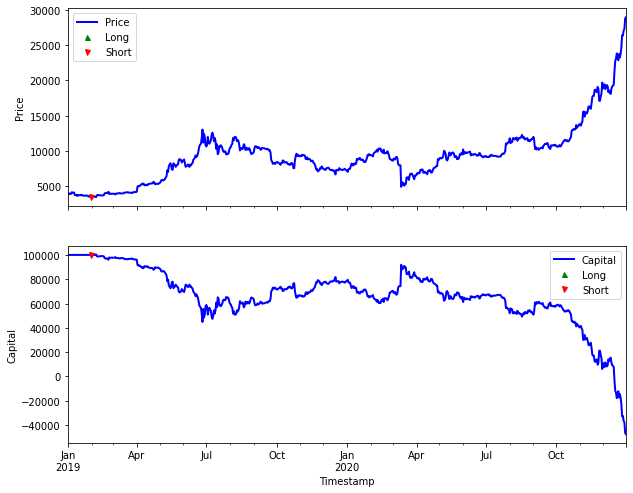

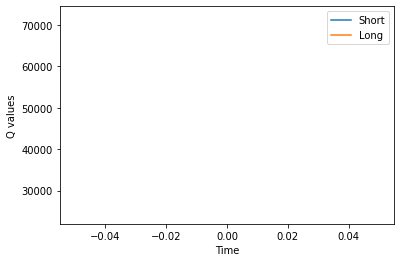

In [4]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
TEST_PARAM['name'] = 'btc_tdqn_LSTM_test'
TEST_PARAM['network'] = 'LSTM'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, TEST_PARAM)
print()

In [ ]:
strategy = "TDQN"
trainCryptocurrency = "Bitcoin"
testCryptocurrency = "Bitcoin"
BACKTEST_PARAM['name'] = 'btc_tdqn_LSTM_backtest'
BACKTEST_PARAM['network'] = 'LSTM'
simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, BACKTEST_PARAM)
print()

In [ ]:
# Haven't scraped eth s2f
# strategy = "TDQN"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Ethereum"
# ETH_TEST_PARAM['name'] = 'eth_tdqn_DQN_test'
# ETH_TEST_PARAM['network'] = 'DQN'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, AI_TRAINING_PARAM, ETH_TEST_PARAM)
# print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# NON_AI_TRAINING_PARAM['name'] = 'btc_mrma_training'
# simulator.nonAiTrain(strategy, trainCryptocurrency, NON_AI_TRAINING_PARAM)
# print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Bitcoin"
# BACKTEST_PARAM['name'] = 'btc_mrma_backtest'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, BACKTEST_PARAM)
# print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Bitcoin"
# TEST_PARAM['name'] = 'btc_mrma_test'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, TEST_PARAM)
# print()

In [ ]:
# strategy = "Mean Reversion Moving Averages"
# trainCryptocurrency = "Bitcoin"
# testCryptocurrency = "Ethereum"
# ETH_TEST_PARAM['name'] = 'eth_mrma_test'
# simulator.test(strategy, trainCryptocurrency, testCryptocurrency, NON_AI_TRAINING_PARAM, ETH_TEST_PARAM)
# print()